In [1]:
import pandas as pd

df_train = pd.read_csv('EV_train.csv')
df_label = pd.read_csv('EV_train_labels.csv')
df_test = pd.read_csv('EV_test.csv')
df_sub = pd.read_csv('sample_submission.csv')

/Anaconda/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df_test_val = df_test.transpose()
df_test_val.reset_index()
df_test_val.columns = df_test_val.iloc[0]
df_test_val = df_test_val.drop(index='House ID')


In [3]:
df_test_val.columns =df_test_val.columns.astype(int)  
df_test_val.head()

House ID,11643173,11655020,11644367,11633356,11649905,11647887,11647719,11649920,11634330,11633656,...,11647979,11637181,11634223,11628915,11644595,11650964,11630831,11629770,11643171,11643369
Interval_1,1.013,1.325,1.543,0.153,0.187,0.782,0.150,0.115,0.117,0.094,...,0.315,0.786,0.286,0.574,1.910,0.443,0.550,0.097,0.835,4.898
Interval_2,0.215,1.413,1.636,0.123,0.004,0.829,0.134,0.080,0.099,0.134,...,0.325,0.536,0.308,0.584,2.013,0.393,1.431,0.142,0.881,4.183
Interval_3,0.217,0.813,1.683,0.146,0.004,0.905,0.150,0.795,0.134,0.117,...,0.305,0.560,0.290,0.584,1.313,0.391,1.063,0.064,0.929,3.695
Interval_4,0.217,0.588,1.556,0.101,0.004,0.495,0.150,1.453,0.134,0.108,...,0.293,0.515,0.258,0.557,1.166,0.390,0.756,0.156,0.678,3.118
Interval_5,0.217,0.213,1.935,0.140,0.004,0.465,0.146,1.553,0.081,0.123,...,0.313,0.558,0.318,0.513,1.243,0.390,0.663,0.065,0.625,3.308


In [4]:
df_train_flip = df_train.transpose()
df_train_flip.reset_index()
df_train_flip.columns = df_train_flip.iloc[0]
df_train_flip = df_train_flip.drop(index='House ID')


In [5]:
df_train_flip.columns =df_train_flip.columns.astype(int)  
df_train_flip.head()

House ID,11655099,11633257,11651552,11636092,11647239,11636875,11636392,11654157,11655054,11635803,...,11654279,11643663,11647508,11647096,11646944,11646330,11644267,11652832,11633186,11650303
Interval_1,0.950,0.353,0.150,2.088,1.416,1.124,0.103,0.685,1.113,0.433,...,0.037,0.535,1.061,0.410,0.569,0.211,0.107,0.738,2.952,0.825
Interval_2,0.826,0.327,0.181,2.075,1.250,0.995,0.126,0.691,1.098,0.412,...,0.026,0.529,1.018,0.285,0.574,0.196,0.116,1.690,2.406,0.894
Interval_3,0.361,0.358,0.150,2.121,1.270,0.792,0.237,0.701,1.355,0.378,...,0.054,0.522,0.573,0.290,0.250,0.276,0.116,0.755,2.081,0.875
Interval_4,0.238,0.292,0.150,2.098,1.258,1.256,0.209,0.689,1.513,0.393,...,0.046,0.670,0.543,0.265,0.079,0.328,0.107,0.795,2.032,0.900
Interval_5,0.342,0.285,0.131,2.046,1.239,0.996,0.183,0.712,1.503,0.399,...,0.026,2.160,0.563,0.305,0.055,0.501,0.118,0.750,1.994,0.319


In [6]:
df_label_flip = df_label.transpose()
df_label_flip.reset_index()
df_label_flip.columns = df_label_flip.iloc[0]
df_label_flip = df_label_flip.drop(index='House ID')



In [7]:
df_label_flip.head()

House ID,11655099,11633257,11651552,11636092,11647239,11636875,11636392,11654157,11655054,11635803,...,11654279,11643663,11647508,11647096,11646944,11646330,11644267,11652832,11633186,11650303
Interval_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Interval_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Interval_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Interval_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Interval_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_EV_present = df_label_flip.loc[:,df_label_flip.any()] 

In [9]:
df_EV_present.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2880 entries, Interval_1 to Interval_2880
Columns: 485 entries, 11647239 to 11650303
dtypes: int64(485)
memory usage: 10.7+ MB


In [10]:
EV_House_ID = df_EV_present.columns

In [11]:
EV_House_ID

Int64Index([11647239, 11655054, 11635803, 11642383, 11655167, 11643133,
            11646352, 11633451, 11640674, 11649350,
            ...
            11640249, 11641535, 11649589, 11637905, 11655275, 11636671,
            11635588, 11643663, 11647508, 11650303],
           dtype='int64', name='House ID', length=485)

In [12]:
EV_House_meter = df_train_flip[EV_House_ID]

In [13]:
EV_House_meter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2880 entries, Interval_1 to Interval_2880
Columns: 485 entries, 11647239 to 11650303
dtypes: float64(485)
memory usage: 10.7+ MB


In [14]:
train_house = EV_House_meter[11647239]
train_label = df_EV_present[11647239]

In [15]:
train_house=pd.DataFrame(train_house)
train_house.columns = ['meter_read']
train_label = pd.DataFrame(train_label)
train_label.columns=['label']

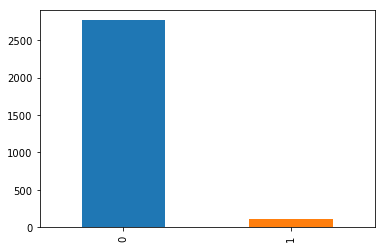

In [16]:
import matplotlib.pyplot as plt
train_label.label.value_counts().plot(kind='bar')
plt.show()

In [17]:
train_label.label.value_counts()

0    2763
1     117
Name: label, dtype: int64

In [18]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2880 entries, Interval_1 to Interval_2880
Data columns (total 1 columns):
label    2880 non-null int64
dtypes: int64(1)
memory usage: 45.0+ KB


In [19]:
tsm = pd.timedelta_range(0, periods=2880, freq='0.5H') # This is done to plot the readings and has no effect on modeling
start=pd.Timestamp('20180601')
train_house['time'] = start + tsm


In [20]:
train_house.head()

,meter_read,time
Interval_1,1.416,2018-06-01 00:00:00
Interval_2,1.250,2018-06-01 00:30:00
Interval_3,1.270,2018-06-01 01:00:00
Interval_4,1.258,2018-06-01 01:30:00
Interval_5,1.239,2018-06-01 02:00:00


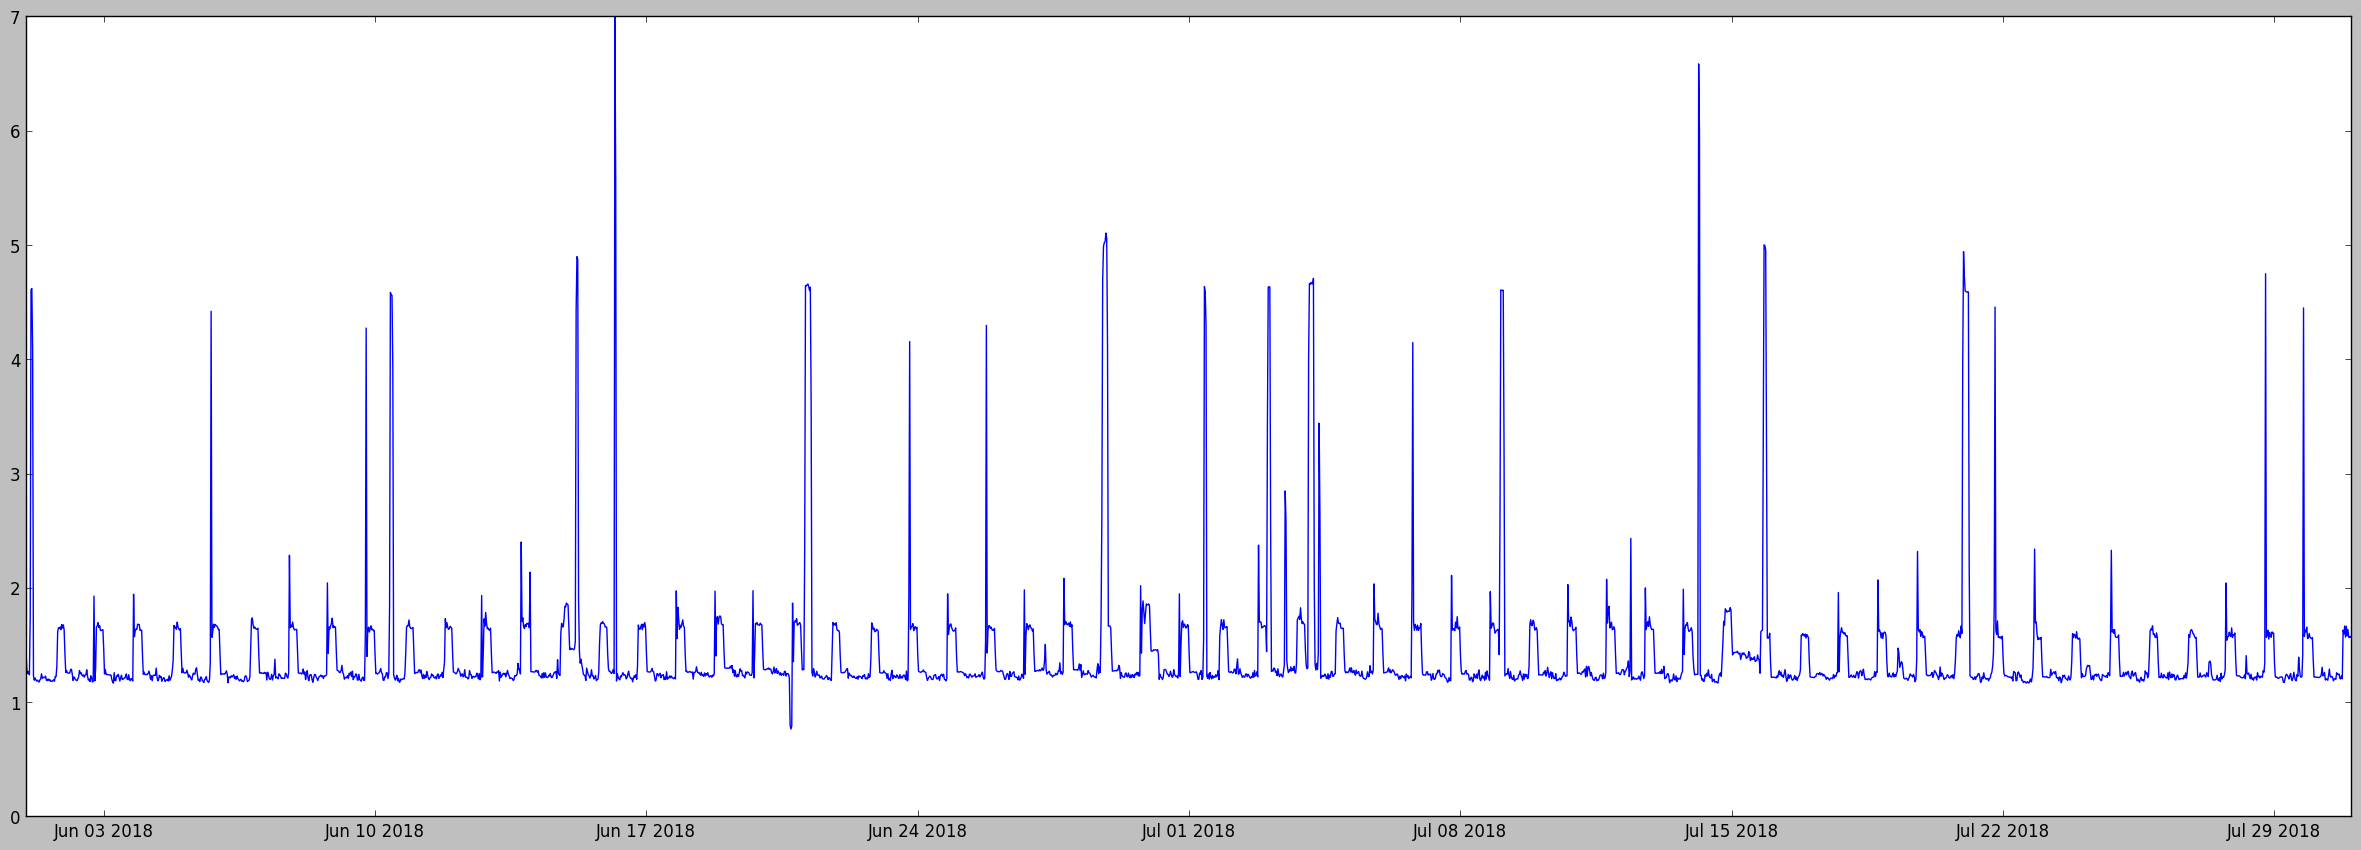

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('classic')
fig,ax = plt.subplots(figsize=(30,10))
ax.plot(train_house.time,train_house['meter_read'])
plt.show()

In [22]:
def create_lagged_features(df, lag=1):
    if not type(df) == pd.DataFrame:
        df = pd.DataFrame(df,columns=['meter_read'])
        
    def _rename_lag(ser,j):
        ser.name = ser.name + f'_{j}'
        return ser
        
    for i in range(48,48*lag,48):
        df = df.join(df.meter_read.shift(i).pipe(_rename_lag, i))
        
    df.dropna(inplace = True)
    
    return df

In [23]:
train_values = create_lagged_features(train_house.meter_read, 6)

In [24]:
train_values.corr(method='spearman')

,meter_read,meter_read_48,meter_read_96,meter_read_144,meter_read_192,meter_read_240
meter_read,1.000000,0.655452,0.607344,0.601686,0.599141,0.612777
meter_read_48,0.655452,1.000000,0.657963,0.609747,0.605435,0.600686
meter_read_96,0.607344,0.657963,1.000000,0.660374,0.608591,0.606590
meter_read_144,0.601686,0.609747,0.660374,1.000000,0.657236,0.608883
meter_read_192,0.599141,0.605435,0.608591,0.657236,1.000000,0.657527
meter_read_240,0.612777,0.600686,0.606590,0.608883,0.657527,1.000000


In [25]:
idx = train_values.index
y = train_label.loc[idx]

In [26]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, Interval_241 to Interval_2880
Data columns (total 6 columns):
meter_read        2640 non-null float64
meter_read_48     2640 non-null float64
meter_read_96     2640 non-null float64
meter_read_144    2640 non-null float64
meter_read_192    2640 non-null float64
meter_read_240    2640 non-null float64
dtypes: float64(6)
memory usage: 144.4+ KB


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error

/Anaconda/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Anaconda/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Anaconda/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Anaconda/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [28]:
tscv = TimeSeriesSplit(n_splits = 3)
my_cv = tscv.split(train_values)


In [29]:
pipe = Pipeline(steps=[('scaler',StandardScaler()),
                      ('logistic',LogisticRegression(class_weight='balanced'))])

In [30]:
param_grid = {'logistic__C':[0.001,0.01,0.01,1,10],
             'logistic__penalty':['l1','l2']}

scoring = {'prc':'precision','rc':'recall','f1':'f1'}

gs = GridSearchCV(estimator = pipe,
                 param_grid=param_grid,
                  scoring=scoring,
                  refit= 'f1',
                 cv=my_cv)

In [31]:
gs.fit(train_values, y.label)

/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x11769cc50>,
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logistic__C': [0.001, 0.01, 0.01, 1, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score='warn',
       scoring={'prc': 'precision', 'rc': 'recall', 'f1': 'f1'}, verbose=0)

In [32]:
gs.best_params_

{'logistic__C': 1, 'logistic__penalty': 'l2'}

In [33]:
gs.best_score_

0.8935043739391566

In [34]:
f1_list = gs.cv_results_['mean_test_f1']
rc_list = gs.cv_results_['mean_test_rc']
prc_list = gs.cv_results_['mean_test_prc']
result_data=list(zip(f1_list,rc_list,prc_list))
result_frame = pd.DataFrame(result_data, columns=['F1','Recall','Precision'])


In [35]:
result_frame 

,F1,Recall,Precision
0,0.166002,0.634921,0.095640
1,0.375639,0.959482,0.237661
2,0.663957,0.968254,0.583811
3,0.846413,0.926065,0.802368
4,0.663957,0.968254,0.583811
5,0.846413,0.926065,0.802368
6,0.877706,0.910944,0.857265
7,0.893504,0.910944,0.887464
8,0.875745,0.899833,0.860774
9,0.889420,0.910944,0.878956


In [36]:
in_sample_preds = gs.predict_proba(train_values)
log_loss(y.label,in_sample_preds)

0.09701939027108276

In [37]:
pred_house=pd.DataFrame(df_test_val[11641229])
pred_house.columns = ['meter_read']
pred_feat = create_lagged_features(pred_house.meter_read, lag=6)

In [38]:
pred_prob = gs.predict_proba(pred_feat)[:,1]

In [39]:
pred_label = gs.predict(pred_feat)

In [40]:
import numpy as np
np.unique(pred_label, return_counts=True)

(array([0, 1]), array([2270,  370]))

In [41]:
pred_feat['pred_label']=pred_label
pred_feat['pred_prob']=pred_prob

In [49]:
pred_feat = pred_feat.reset_index()

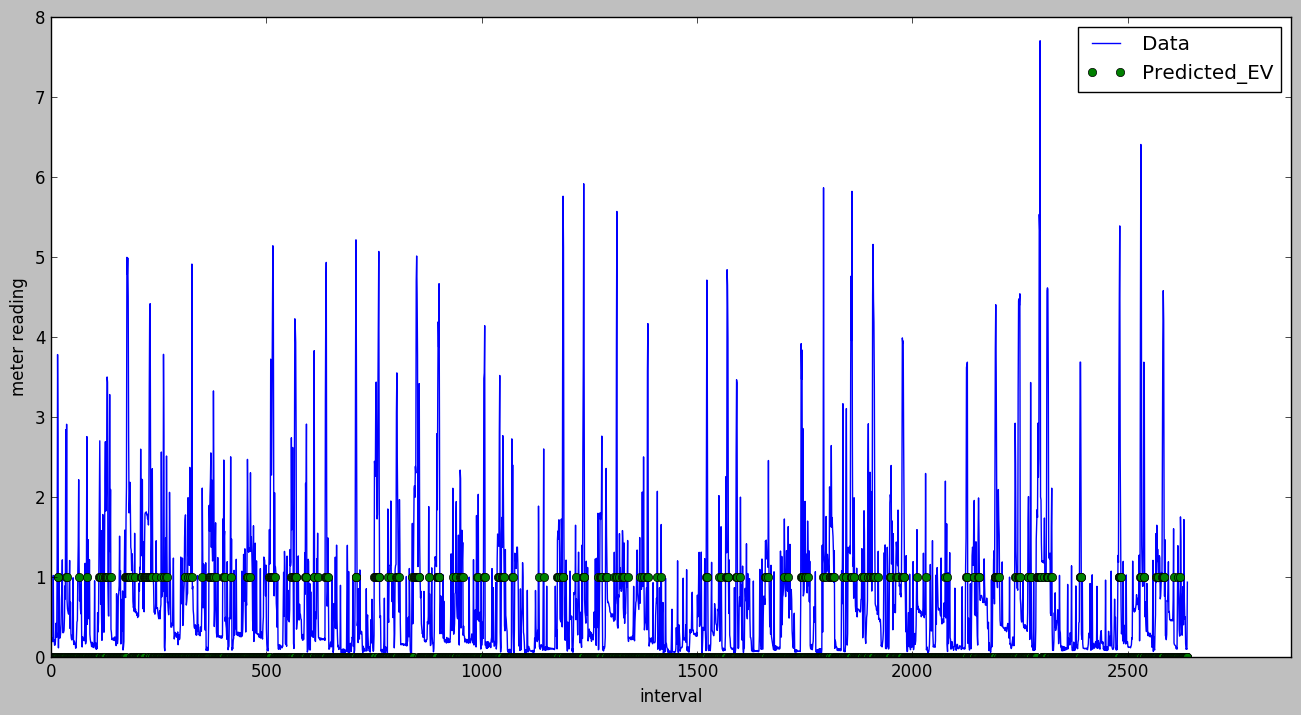

In [52]:
plt.figure(figsize=(16,8))
plt.plot(pred_feat.index, pred_feat['meter_read'], label='Data')
plt.plot(pred_feat.index, pred_feat['pred_label'], linestyle='None', marker='o', label='Predicted_EV')
plt.ylabel('meter reading')
plt.xlabel('interval')
plt.xlim(0,2880)
plt.legend(loc='best')